# A New Approach to Linear Filtering and Prediction Problems
## a.k.a. Kalman Filters
### Papers We Love NYC
Elizabeth Ramirez

In [1]:
%matplotlib inline
import numpy
from numpy.random import randn
import matplotlib.pyplot as plt

## Intro
![Rudolf_Kalman_Obama](obama_kalman.jpg)  
Original paper: [http://www.cs.unc.edu/~welch/kalman/media/pdf/Kalman1960.pdf]

## What is a Kalman Filter
Prediction-correction technique  
Calculate recursively system state $u_k$ at time $t_k$ given previous state $u_{k - 1}$ and new information $b_k$

## Kalman Filters for Rocket Science
Used for Apollo Space Program of NASA in early 1960's  
Transcription of the original code available at [http://www.ibiblio.org/apollo/]  
Implemented in AGC4 assembly language.

```
# Copyright:	Public domain.
# Filename:	 KALMAN_FILTER.agc
# Purpose:	  A section of Luminary 1C, revision 131.
#		       It is part of the source code for the Lunar Module's (LM)
#		       Apollo Guidance Computer (AGC) for Apollo 13 and Apollo 14.
#		       This file is intended to be a faithful transcription, except
#		       that the code format has been changed to conform to the
#		       requirements of the yaYUL assembler rather than the
#		       original YUL assembler.
# Reference:	pp. 1467-1468 of 1729.pdf.
# Contact:	  Ron Burkey <info@sandroid.org>.
# Website:	  www.ibiblio.org/apollo/index.html
# Mod history:  06/08/03 RSB.	Began transcribing.
#		       05/14/05 RSB	Corrected website reference above
```

## Background
- Random processes (Appendix)
- Dynamic systems
- Vector spaces
- Least Squares and Normal Equation

## Vector Spaces
$\mathcal{V}$ a.k.a. Linear Spaces. A space of vectors with a metric: norm, notion of distance, often represented by $|| \cdot ||$ and the following properties:

- $f, g \in \mathcal{V} \rightarrow f + g = h \in \mathcal{V}$

- $\lambda \in \mathbb{R}, f \in \mathcal{V} \rightarrow \lambda f \in \mathcal{V}$

## Least Squares
<br><br>
$$
\text{Linear System } \textbf{A}\textbf{u} = \textbf{b} \qquad A = m\times n \qquad \textbf{u}, \textbf{b} 
\text{ are n-vectors} \\
\text{If } A \text{ is square: } m = n \rightarrow \textbf{u} = A^{-1}\textbf{b} \\~\\
\text{But if } A \text{ is not square: } m > n \\
\text{System is } \textbf{overdetermined} \\~\\
\text{Example: 100 points that fit } Cx + D
$$

## Least Squares
<br><br>
$$
\textbf{Solution: } \text{Find best estimate for state } \textbf{u} \text{ that minimizes:} \\
E = \left| \textbf{b} - \textbf{A}\hat{\textbf{u}} \right|^2 \\~\\
\text{Solve for } \hat{\textbf{u}} \text{ (an estimate) to minimize } E \\~\\
\textbf{Normal Equation: } \textbf{A}^T\textbf{A}\hat{\textbf{u}} = \textbf{A}^T\textbf{b}\\
\underset{n\times m}{\mathrm{A^T}} \underset{m\times n}{A} = \underset{n\times n}{A^TA}\\
\hat{u} = (A^TA)^{-1} A^T b
$$

## Motivation
Wiener Filter Problems:
- Impulse response
- Numerical determination

## Situation
<br><br>
$$
\text{Given a signal: } \textbf{y}(t) = \textbf{x}_1(t) + \textbf{x}_2(t) \\
\textbf{x}_1(t): \text{true signal, }\textbf{x}_2(t): \text{noise} \\~\\
\textbf{y}(t_1) \text{?} \\
\text{If }t_1 < t \text{ : Smoothing} \\
\text{If }t_1 = t \text{ : Filtering} \\ 
\text{If }t_1 > t \text{ : Prediction} \\
$$

## Theorem 1
<br><br>
$$
\text{Statistical Estimate } X_1(t_1|t) \\
\text{Estimation Error } \epsilon = x_1(t_1) - X_1(t_1|t) \\~\\
\text{Loss Function } L(\epsilon): \\
L(0) = 0\\
L(\epsilon_2) \geq L(\epsilon_1) \geq 0 \text{ when } \epsilon_2 \geq \epsilon_1 \geq 0 \\
L(\epsilon) = L(-\epsilon) \\~\\
\text{Minimize } E\{L[x_1(t_1) - X_1(t_1)] | y(t_0) … y(t)\}
$$

## Theorem 1-a
<br><br>
$$
\text{If } L(\epsilon) = \epsilon^2 \text{ , Theorem 1 is true without assumptions about symmetry and convexity around the mean.}
$$

## Problem Summary
<br><br>
$$
\text{Given a vector-valued random process } {x(t)}\\
\text{and observed random variables } y(t_0) … y(t) \\
\text{Find an estimate } X(t_1) \text{ that minimizes the expected loss } E\{L||x(t_1) - X(t_1)||\}
$$ 

## Orthogonal Projections
<br><br>
$$
\text{Vector Space } \mathcal{Y}(t) = \sum_{i = t_0}^{t} a_i y(i) \\~\\
\text{Given } u, v \in \mathcal{Y}(t) \text{ orthogonal if } E[u \cdot v] = 0 \\~\\
\text{Orthonormal basis in } \mathcal{Y}(t) = e_{t_0} ..., e_t \text{ such that } \\
\bar{x} = \sum_
{i = t_0}^{t} a_i e_i \\~\\
x = \bar{x} + \tilde{x}
$$
![orthoprojection](orthoproj.png)

From functional analysis, we know that our estimate X1(t1) might or might not live in this vector space Y(t). We would really like our solution to live here. If the vector space is too small, we want to minimize the distance between my estimate and the vector space.

Given this, and given we can determine the coefficients of the linear combination, any random variable x, not necessarily in Y(t) can be uniquely decomposed into two parts: a part in Y(t) and a part orthogonal to Y(t) (orthogonal to every vector in Y(t)). 

See equation 10. The orthogonal projection of x in Y(t): x bar is that vector in Y(t) that minimizes the quadratic loss. This is the key part.

## Theorem 2
<br><br>
$$
\text{Let } \{x(t)\} \text{ and } \{y(t)\} \text{ be random processes with zero mean } E[x(t)] = E[y(t)] = 0 \\
\text{Observe } y(t_0) ... y(t) \\
\text{If either the random processes are gaussian or the loss function is restricted to be } L(\epsilon)=\epsilon^2 \\
\text{ then the optimal estimate of x(t1|t) is given by the orthogonal projection } \bar{x} \text{ of } x(t_1)
\text{ on } \mathcal{Y}(t)
$$

## Recursive Least Squares
<br><br>
$$
\hat{u_{99}}: \text{Average of } b_1, b_2, \dots , b_{99} \\~\\
b_{100} \rightarrow \hat{u_{100}} \\~\\
\hat{u_{100}} = \frac{99}{100} \hat{u_{99}} + \frac{1}{100}b_{100} \\
\qquad = \hat{u_{99}} + \frac{1}{100}(b_{100} - \hat{u_{99}}) \\
b_{100} - \hat{u_{99}}: \textbf{innovation} \qquad
\frac{1}{100}: \textbf{gain factor}
$$

## Recursive Least Squares
<br>
Generalizing the Normal Equation:
$$
\begin{aligned}
&\begin{bmatrix} A_{old} \\ A_{new} \end{bmatrix} \begin{bmatrix} u \end{bmatrix} = 
\begin{bmatrix} b_{old} \\ b_{new} \end{bmatrix} \rightarrow \hat{u_{new}}
\end{aligned}
$$
<br>
$$
\begin{aligned}
&A^T = \begin{bmatrix} A_{old}^T & A_{new}^T \end{bmatrix}\\
&A^TA = \begin{bmatrix} A_{old}^T & A_{new}^T \end{bmatrix} \begin{bmatrix} A_{old}^T \\ A_{new}^T \end{bmatrix} \\
&\qquad = A^T_{old} A_{old} + A^T_{new}A_{new} = (known) + (new)
\end{aligned}
$$
<br>
Right-hand side
$$
\begin{aligned}
&A^Tb =  \begin{bmatrix} A_{old}^T & A_{new}^T \end{bmatrix} \begin{bmatrix} b_{old}^T \\ b_{new}^T \end{bmatrix} \\
&\qquad = A^T_{old} b_{old} + A^T_{new} b_{new}\\
&\qquad = A^T_{old} A_{old} \hat{u_{old}} + A^T_{new} b_{new}
\end{aligned}
$$

## Recursive Least Squares 
<br><br>
$$
\hat{u_{new}} = \hat{u_{old}} + (A^TA)^{-1} A^T_{new}(b_{new} - A_{new} b_{old}) \\~\\
(A^TA)^{-1} A^T_{new}: \textbf {gain matrix, } K \text{ (as in Kalman, duh)}\\~\\
\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} \begin{bmatrix} u \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_{99} \end{bmatrix}\\
u = b_{100} = b_{new} \rightarrow A_{new} = \begin{bmatrix} 1 \end{bmatrix}\\
\hat{u_{100}} = \hat{u_{99}} + \frac{1}{100}(b_{100} - \hat{u_{99}})
$$

## Covariance Matrix
When errors are independent:
<br><br>
$$
\sigma_{ij} = \sigma_{ji} = E[e_i e_j] = 0
$$
<br>
$$
\Sigma_e = E(e e^T) = 
\begin{bmatrix}
\sigma_1^2\\
&\sigma_2^2\\
&& \ddots\\
&&&\sigma_k^2\\
\end{bmatrix} \\~\\
C = \Sigma_e^{-1}: \textbf{Weighting Matrix}
$$
### Weighted Normal Equation
$$
A^TCA\hat{u} = A^TCb \\
\hat{u} = (A^TCA)^{-1} A^TCb = Lb
$$

## The Kalman Filter
<br><br>
$$
\text{Time varying least squares problem: Estimate } \hat{u_k} \text{ at each time } t_k \\
\hat{u_{new}} = L \hat{u_{old}} + Kb_{new}\\
\hat{u_{new}} = \hat{u_{old}} + K(b_{new} - A_{new}\hat{u_{old}}) \\
\text{innovation } b_{new} - A_{new}\hat{u_{old}} \\
\text{covariance matrix } P = (A^TCA)^{-1}
$$


## Algorithm
### Prediction
<br>
$$
\hat{u_{k|k-1}} = F \hat{u_{k-1|k-1}} + \epsilon_i \\
P_{k|k-1} = AP_{k-1|k-1}A^T + Q \\
F: \textbf{state transition matrix} \\
Q: \textbf{covariance matrix of random excitation}
$$

### Correction
<br>
$$
K_k = P_{k|k-1}A^T(AP_{k|k-1}A^T + R)^{-1} \\
\hat{u_{k|k}} = \hat{u_{k|k-1}}  + K_k(b_k - A\hat{u_{k|k-1}}) \\
P_{k|k} = (I - K_kA)P_{k|k-1}
$$

F is called the state transition matrix. It establishes how the state vector changes from one time step to another.
Q is the covariance matrix of system error

## Implementation
- Predicted state and covariance (before the measurement)
- Corrected state and covariance (after the measurement)
- Innovation
- Filter gain

## Prediction / Correction
- Previous state vector $u$
- Predicted state vector $\hat u$
- Matrix of observation equations $A$
- Vector of observations $b$
- Predicted covariance matrix $P$
- Process noise matrix $Q$
- Observations noise matrix $R$

In [2]:
def predict(u, P, F, Q):
    u = numpy.dot(F, u)
    P = numpy.dot(F, numpy.dot(P, F.T)) + Q
    
    return u, P

In [3]:
def correct(u, A, b, P, Q, R):
    C = numpy.dot(A, numpy.dot(P, A.T)) + R
    K = numpy.dot(P, numpy.dot(A.T, numpy.linalg.inv(C)))
    
    u = u + numpy.dot(K, (b - numpy.dot(A, u)))
    P = P - numpy.dot(K, numpy.dot(C, K.T))
    
    return u, P

In [4]:
# Test data
dt = 0.1
A = numpy.array([[1, 0], [0, 1]])
u = numpy.zeros((2, 1))
# Random initial measurement centered at state value
b = numpy.array([[u[0, 0] + randn(1)[0]], [u[1, 0] + randn(1)[0]]])

P = numpy.diag((0.01, 0.01))
F = numpy.array([[1.0, dt], [0.0, 1.0]])
# Unit variance for the sake of simplicity
Q = numpy.eye(u.shape[0])
R = numpy.eye(b.shape[0])

In [5]:
N = 500
predictions, corrections, measurements = [], [], []
for k in numpy.arange(0, N):
    u, P = predict(u, P, F, Q)
    predictions.append(u)
    u, P = correct(u, A, b, P, Q, R)
    corrections.append(u)
    measurements.append(b)
    b = numpy.array([[u[0, 0] + randn(1)[0]],
                     [u[1, 0] + randn(1)[0]]])

print 'predicted final estimate: %f' % predictions[-1][0]
print 'corrected final estimate: %f' % corrections[-1][0]
print 'measured state: %f' % measurements[-1][0]

predicted final estimate: -16.969732
corrected final estimate: -16.994212
measured state: -17.009443


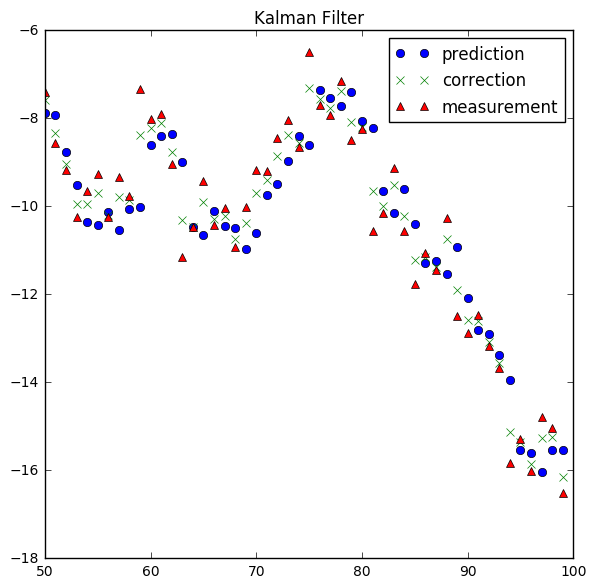

In [6]:
t = numpy.arange(50, 100)
fig = plt.figure(figsize=(15,15))

axes = fig.add_subplot(2, 2, 1)
axes.set_title("Kalman Filter")
axes.plot(t, numpy.array(predictions)[50:100, 0], 'o', label='prediction')
axes.plot(t, numpy.array(corrections)[50:100, 0], 'x', label='correction')
axes.plot(t, numpy.array(measurements)[50:100, 0], '^', label='measurement')
plt.legend()
plt.show()

## Conclusions
- Kalman Filter is a generalized least squares problem for dynamical systems.
- Computationally more efficient
- Strang, Gilbert. *Computational Science and Engineering*

## Thank you!
eramirem@gmail.com
<br>
@eramirem